# The HFM library - A fast marching solver with adaptive stencils

## Part : Image models and segmentation
## Chapter : Geodesic models with convexity shape prior (Interactive)

We consider variants of the curvature penalized path models which enforce convexity. They are obtained by simple modifications of the Hamiltonian of the eikonal PDE, which only propagate the front in the direction of increasing angles. In addition, a wall can be introduced in the computational domain to ensure that the angle does not increase by more than $2 \pi$.

In a preliminary section, we illustrate these models in free space. Afterwards, they are used to segment a region in an image with a convex shape prior.

Reference:
- Chen, D., Mirebeau, J.-M., Shu, M., Tai, X., and Cohen, L. D. (2021). *Geodesic Models with Convexity Shape Prior*. [arXiv Preprint](https://arxiv.org/abs/2111.00794)

### Mathematical background

We consider geodesic models on the positions-orientations space $\Omega \times S^1$, where $\Omega \subset R^2$ is the physical domain. They are defined in terms of an orientation dependent Hamiltonian $H$, and of a ground cost function $c$:
$$
    H_\theta (\hat x,\hat p)\qquad c(x,\theta),
$$
for any point $(x,\theta) \in \Omega\times S^1$ and any co-tangent vector $(\hat x,\hat \theta) \in R^2 \times R$.

The corresponding generalized eikonal equation reads: find a viscosity solution $u : \Omega \times S^1 \to R$ obeying
$$
    H_\theta(\nabla_x u,\partial_\theta u) = c(x,\theta),
$$
except for a point source condition $u(x_0,\theta_0) = 0$, and with outflow boundary conditions on $\partial \Omega \times S^1$. This PDE is numerically solved using an adequate finite differences scheme, and once this is done the corresponding minimal paths can be backtracked. See the reference given in the introduction for details.

**Vanishing directions of the Hamiltonian**
The chosen Hamiltonians $H$ are non-negative, but vanish in specific directions, which prevents the front from propagating this way. 
This can be interpreted in the context of vehicle modeling. In the following, we denote $e(\theta) := (\cos\theta,\sin\theta)$.
- $H_\theta(\pm e(\theta)^\perp,0) = 0$. No transversal motion : the vehicle can only move in the orientation that it is heading to.
- $H_\theta(- e(\theta),0) = 0$. No reverse gear : the vehicle can only move forward.
- $H_\theta(0,-1) = 0$. No right turns : the vehicle can only turn left, hence it locally follows the boundary of a counter-clockwise convex shape.

**Lagrangian, and sub-Finsler geodesic metric**
The Lagrangian $L_\theta$ is obtained from the Hamiltonian $H_\theta$ by Legendre-Fenchel duality. The geodesic metric  of the model is then $F_\theta := \sqrt{2L_\theta}$. Interestingly, for the models considered in the following paragraph, the Lagrangian and the metric admit a closed form expression, which is provided in the cited reference. 

### Models of interest

We consider variants of the Reeds-Shepp forward-only car, Euler-Mumford elastica, and Dubins vehicle. 
The parameter $\xi$ should be regarded as a typical radius of curvature, and dictates the intensity of curvature penalization.

**Convex Reeds-Shepp forward model.**
It is defined by the Hamiltonian
$$
    2 H_\theta(\hat x,\hat \theta) :=  <\hat x,e(\theta)>_+^2 + \xi^{-2} \hat \theta_+^2,
$$
where $(x,\theta) \in R^2 \times S^1$ is the current state, $(\hat x,\hat \theta)$ is a co-vector at this point, and $e(\theta) := (\cos \theta ,\sin \theta)$.

For comparison, the Hamiltonian of the usual Reeds-Shepp model is defined by a similar expression, except for the term $\hat \theta^2$ (in place of $\hat \theta_+^2).

The geodesics of the convex Reeds-Shepp model may feature straight segments, and angles.

**Convex Euler-Mumford elastica model.**
It is defined by the Hamiltonian 
$$
    H_\theta(\hat p) = \frac 3 8 \int_0^{\pi/2} <\hat p,e(\theta,\phi)>_+^2 \cos \phi\, d \phi. 
$$
where $(x,\theta) \in R^2 \times S^1$ is the current state, $\hat p = (\hat x,\hat \theta)$ is a co-vector at this point, and $e(\theta,\phi) := (\cos \theta \cos \phi,\sin \theta\cos \phi,\xi^{-1}\sin\phi)$.

For comparison, the Hamiltonian of the usual Euler-Mumford elastica model is defined by a similar expression where the integral ranges over $[-\pi/2,\pi/2]$.

The geodesics of the convex elastica model *cannot* feature straight segments, and *cannot* feature angles. Both have a cost of $+\infty$.

**Convex Dubins model.**
It is defined by the Hamiltonian
$$
    2 H_\theta(\hat x,\hat \theta) = \max\{<\hat x,e(\theta)> + \xi^{-1} \hat \theta,\ <\hat x,e(\theta)>\}^2
$$

The geodesics of the convex Dubins model can feature straight segments, but *cannot* feature angles. In fact, the radius of curvature of these trajectories is bounded below by $\xi$.


**Summary of geometrical properties,** which can be of interest for region segmentation. (Eg: smooth region, polygonal region, etc)

|Convex variant|Reeds-Shepp|Elastica|Dubins|
|-|-|-|-|
|Straight segments|Yes|No|Yes|
|Angles|Yes|No|No|



[**Summary**](Summary.ipynb) of volume Fast Marching Methods, this series of notebooks.

[**Main summary**](../Summary.ipynb) of the Adaptive Grid Discretizations 
	book of notebooks, including the other volumes.

# Table of contents
  * [1. Preliminary : Convex geodesics in free space](#1.-Preliminary-:-Convex-geodesics-in-free-space)
    * [1.1 Original models](#1.1-Original-models)
    * [1.2 Convex variants](#1.2-Convex-variants)
  * [2. Image pre-processing](#2.-Image-pre-processing)
    * [2.1 The structure tensor](#2.1-The-structure-tensor)
    * [2.2 Edge detection and metric](#2.2-Edge-detection-and-metric)
  * [3. Geometric input](#3.-Geometric-input)
    * [3.1 Pick boundary points](#3.1-Pick-boundary-points)
    * [3.2 Obstacles](#3.2-Obstacles)
  * [4. Run the eikonal solver](#4.-Run-the-eikonal-solver)
    * [4.1 Curvature penalized model](#4.1-Curvature-penalized-model)
    * [4.2 Convexity constrained model](#4.2-Convexity-constrained-model)



This Python&reg; notebook is intended as documentation and testing for the [HamiltonFastMarching (HFM) library](https://github.com/mirebeau/HamiltonFastMarching), which also has interfaces to the Matlab&reg; and Mathematica&reg; languages. 
More information on the HFM library in the manuscript:
* Jean-Marie Mirebeau, Jorg Portegies, "Hamiltonian Fast Marching: A numerical solver for anisotropic and non-holonomic eikonal PDEs", 2019 [(link)](https://hal.archives-ouvertes.fr/hal-01778322)

Copyright Jean-Marie Mirebeau, University Paris-Sud, CNRS, University Paris-Saclay

## 0. Importing the required libraries

In [1]:
import sys; sys.path.insert(0,"..") # Allow import of agd from parent directory (useless if conda package installed)
#from Miscellaneous import TocTools; print(TocTools.displayTOC('Interactive_ConvexRegionSegmentation','FMM'))

In [2]:
from agd import Eikonal
from agd import AutomaticDifferentiation as ad
from agd import LinearParallel as lp
from agd import Plotting
#from agd.Plotting import savefig; savefig.dirName = "Figures/ConvexRegionSegmentation"
from agd import Metrics

In [3]:
import numpy as np; xp=np
import matplotlib.pyplot as plt
import matplotlib.image
from scipy import ndimage
npeigh = np.linalg.eigh

### 0.1 Additional configuration

Uncomment the following line for interactive user input. Default values are always provided. 

**Interactive input is UNAVAILABLE on Google Colab,** since it requires the `tk` matplotlib frontend, which is not supported on this platform. 

In [4]:
interactive = False

Uncomment the following line to use the GPU eikonal solver and cupy library.

**Note.** `cupy.linalg.eigh` seems buggy (cupy 10.3), hence we use `np.linalg.eigh` in all cases.

In [5]:
#xp,plt,Eikonal,ndimage,Plotting,npeigh = [ad.cupy_friendly(e) for e in (xp,plt,Eikonal,ndimage,Plotting,npeigh)]

## 1. Preliminary : Convex geodesics in free space

We illustrate the geodesics associated to the Reeds-Shepp car, Euler-Mumford elastica, and Dubins vehicle, and to the convex variants of these models. 
For simplicity and clarity, the domain is an empty space, without obstacles, and with a unit cost function $c(x,\theta)\equiv 1$. 

### 1.1 Original models

Note that the Reeds-Shepp forward model has in-place rotations at the beginning and end.

In [6]:
hfmIn = Eikonal.dictIn({
    'model':'Elastica2',
    'xi':0.4,
    'seed': (1,0,0),
    'tips': [(-1,0.5,0),(-1,-0.5,0)],
    'cost':1,
})

hfmIn.SetRect([[-2,2],[-1.3,1.3]],dimx=200)
hfmIn.nTheta = 100

#Some CPU or GPU specific options
if xp is np: hfmIn.update({'stopWhenAllAccepted':hfmIn['tips'],'geodesicSolver':'ODE'})
else:hfmIn['geodesic_targetTolerance']=15

In [7]:
#hfmOut['keys']['default']

Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.778685 s.
Field geodesicStep defaults to 0.25
Field geodesicCausalityTolerance defaults to 4
Field geodesicTargetTolerance defaults to 6


Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 9.03144 s.
Field geodesicStep defaults to 0.25
Field geodesicCausalityTolerance defaults to 4
Field geodesicTargetTolerance defaults to 6


Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 3.035 s.
Field geodesicStep defaults to 0.25
Field geodesicCausalityTolerance defaults to 4
Field geodesicTargetTolerance defaults to 6


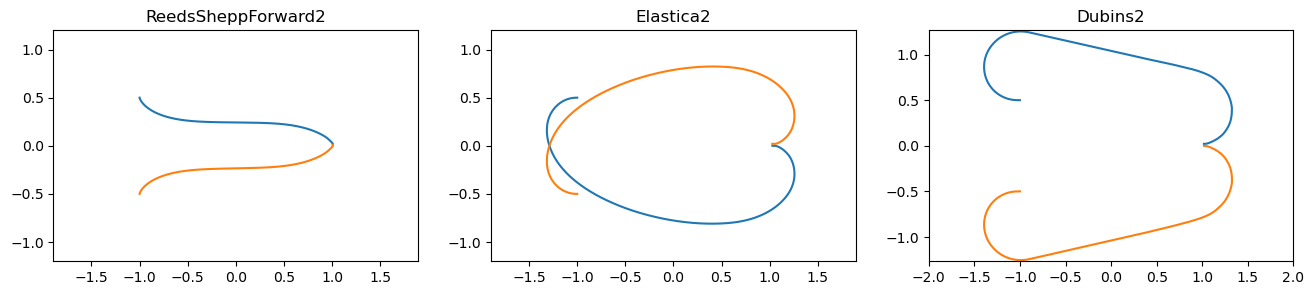

In [8]:
plt.figure(figsize=[16,3])
for i,model in enumerate(('ReedsSheppForward2','Elastica2','Dubins2')):
    hfmIn['model'] = model
    hfmOut = hfmIn.Run()
    ax = plt.subplot(1,3,i+1)
    plt.title(model); plt.axis('equal')
    ax.set_xlim(-2,2); ax.set_ylim(-1.2,1.2); 
    for geo in hfmOut['geodesics']:  plt.plot(geo[0],geo[1])

### 1.2 Convex variants

We use the `convex_curvature_macro` trait parameter to forbid rotation on the left, and make the following observations
- both paths are modified for the Reeds-Shepp forward model. Indeed, the original path had both convex and concave parts.
- one path is strongly modified for the Euler-Mumford elastica model. The second path is also likely slightly modified, due to the modification of the Hamiltonian, but it is harder to see.
- only one path is modified for the Dubins model.

<!---the paths of the Euler-Eumford elastica model make several turns, hence are not part of the boundar of a convex set. This is an issue that needs to be addressed. --->

Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.654805 s.
Field geodesicStep defaults to 0.25
Field geodesicCausalityTolerance defaults to 4
Field geodesicTargetTolerance defaults to 6


Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 3.56736 s.
Field geodesicStep defaults to 0.25
Field geodesicCausalityTolerance defaults to 4
Field geodesicTargetTolerance defaults to 6


Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 1.46481 s.
Field geodesicStep defaults to 0.25
Field geodesicCausalityTolerance defaults to 4
Field geodesicTargetTolerance defaults to 6


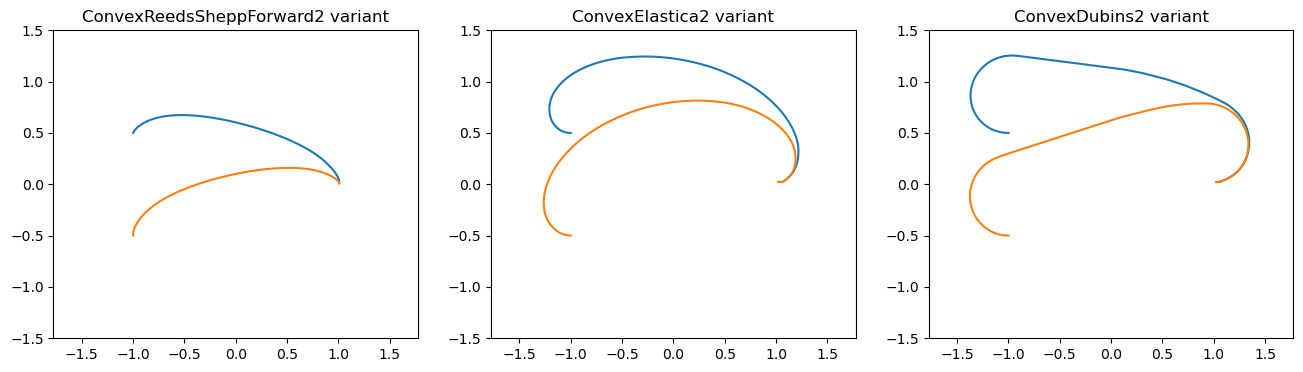

In [9]:
plt.figure(figsize=[16,4])
for i,model in enumerate(('ConvexReedsSheppForward2','ConvexElastica2','ConvexDubins2')):
    hfmIn['model'] = model
    hfmOut = hfmIn.Run()
    ax = plt.subplot(1,3,i+1)
    plt.title(model+" variant"); plt.axis('equal')
    ax.set_xlim(-2,2); ax.set_ylim(-1.5,1.5); 
    for geo in hfmOut['geodesics']:  plt.plot(geo[0],geo[1])

## 2. Image pre-processing

The rest of this section is devoted to an active contours image segmentation method with a *convexity* prior. 
The method proceeds in three main steps:
- *Pre-processing*, where filters such as the *structure tensor* are used to analyse locally the image. In particular, we design a Riemannian metric which favors paths aligned with the image edges.
- *Geometric input*, where a few points on the boundary of the shape of interest are requested to the user. Optionally, some user defined obstacles may also be introduced inside or outside the shape of interest.
- *Eikonal solver* and minimal path computation.

If `interactive=True` was set, then a number of user interactions will be required.


<!---# Here we define a test image.
dx=0.01
aX = np.arange(-1,1,dx)
aY = np.arange(-0.5,0.9,dx)
X = np.meshgrid(aX,aY,indexing='ij')

#im = np.array((1.3*X[0]**2+5*X[1]**2<=1) | (8*(X[0]**2+(X[1]-0.42)**2)<=1)).astype(float)
im = np.array((1.3*X[0]**2+5*X[1]**2<=1) | ((X[0]**2+(X[1]-0.48)**2)<=1/12)).astype(float)

matplotlib.image.imsave("Images_ConvexRegionSegmentation/img_nonconvexbd.png",(255*np.moveaxis(im[:,::-1],0,1)).astype(np.int8),cmap="Greys")
--->

In [10]:
images = {
    0:("img_nonconvexbd.png","Elastica2",None,1,[[14, 187], [57, 55]]), #Synthetic
    1:("img_30.png",None,None,0.03,[[27, 132], [150, 161]]), #Cell
    2:("img_2.png",None,None,None,[[169, 407], [89, 227]]), #Truck
    3:("img_23.png","Elastica2",60,None,[[81, 397], [111, 108]]), #Dog
    4:("img_51.png",None,None,0.03, [[280, 147, 72], [275, 300, 112]]), #MRI
}
#np.round(boundary_pts).astype(int).tolist()

In [11]:
iimage = 2
if interactive: iimage = int(Plotting.input_default("Choose a test case",str(iimage)))

In [12]:
image_filename,model,ξ,λ,boundary_pts = images[iimage]
im = Plotting.imread("Notebooks_FMM/TestImages/ConvexRegionSegmentation/"+image_filename)/255
if xp is not np: im = xp.array(im,dtype=np.float32)
im = np.moveaxis(im,0,1)[:,::-1,:3] # ignore alpha channel, use cartesian coordinates

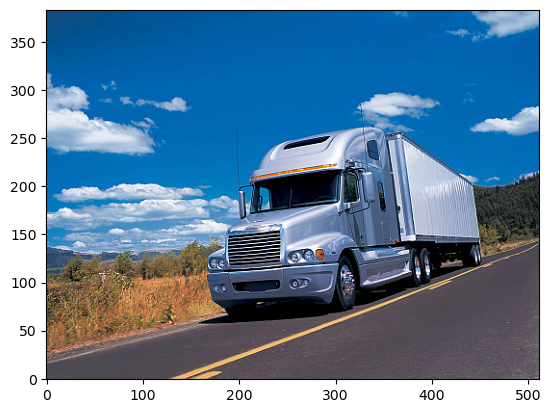

In [13]:
Plotting.imshow_ij(im);

**Interaction opportunity.** (Some of) The following parameters could be set interactively.

In [14]:
# Structure tensor parameters
ρ = 5 # feature scale, in pixels
σ = 2 # noise scale, in pixels
dx = 1/(2*ρ) # Grid scale

# Metric construction parameters
if λ is None: λ=0.05

# Vehicle model parameters
if model is None: model = 'ReedsSheppForward2'
if ξ is None: ξ = 1/dx # typical curvature radius of the vehicle, in pixels

In [15]:
hfmIn = Eikonal.dictIn({
    'model':model,
    'xi':ξ,
    'dims':(*im.shape[:2],64),
    'gridScale':1.,
    'origin':(-0.5,-0.5),
})

In [16]:
X = ad.array(np.meshgrid(*hfmIn.Axes()[:2],indexing='ij'))

### 2.1 The structure tensor

The structure tensor, with feature scale $\rho$ and noise scale $\sigma$, is defined as 
$$
    S := g_\rho \star (\nabla u_\sigma \nabla u_\sigma^\top),
$$
where $u_\sigma := g_\sigma \star u$, and $g_s$ denotes the Gaussian kernel of standard deviation $s$.

This object robustly estimates the gradient orientation and magnitude in an image, and for that reason it is at the foundation of many classical/historical image processing techniques, such as [edge enhancing diffusion](../Notebooks_Div/AnisotropicDiffusion.ipynb). 

In [17]:
def array_map(f,x,fdim):
    """
    Input :
    - f function, which applies to arrays with fdim dimensions
    - x array with more than fdim dimensions
    Output : 
    - f mapped to array, seen as a collection of arrays with fdim dimensions
    """
    xdim = x.ndim-fdim; assert xdim>=0
    xshape,fshape = x.shape[:xdim],x.shape[xdim:]
    out = ad.array([f(xi) for xi in x.reshape((-1,*fshape))])
    out = np.reshape( out, xshape+out[0].shape)
    return out

In [18]:
def gaussian_filter(x,*args,fdim=2,**kwargs): # Applies to multi-channel images
    return array_map(lambda xi:ndimage.gaussian_filter(xi,*args,**kwargs),x,fdim)

In [19]:
def StructureTensor(u,σ=2.,ρ=5.,dx=1,fdim=2):
    """
    Computes the structure tensor of u,
    with noise scale σ and feature scale ρ.
    Applies to fdim dimensional arrays.
    - dx : grid scale.
    """
    # Compute grad uσ
    eye = np.eye(fdim).astype(int)
    duσ = [gaussian_filter(u,σ,order=e,fdim=fdim)/dx for e in eye]
    
    # Self outer product and averaging 
    S = gaussian_filter(lp.outer_self(duσ),ρ,fdim=fdim)
    
    # sum over channels
    if fdim<u.ndim: S = np.sum(S.reshape((fdim,fdim,-1,*u.shape[-fdim:])),axis=2)
    return S

**Interaction.** Define the Structure tensor parameters

In [20]:
S = StructureTensor(np.moveaxis(im,-1,0),σ,ρ,dx=dx)

In [21]:
def eigh(S): 
    """Similar to np.linalg.eigh, but with geometry first"""
#    μ,v = xp.linalg.eigh(np.moveaxis(S,(0,1),(-2,-1)))
     # cupy.linalg.eigh buggy (10.3) -> Transfering back and forth to cpu
    μ,v = [xp.array(e) for e in npeigh(np.moveaxis(S,(0,1),(-2,-1)))]
    return np.moveaxis(μ,-1,0), np.moveaxis(v,(-1,-2),(0,1))

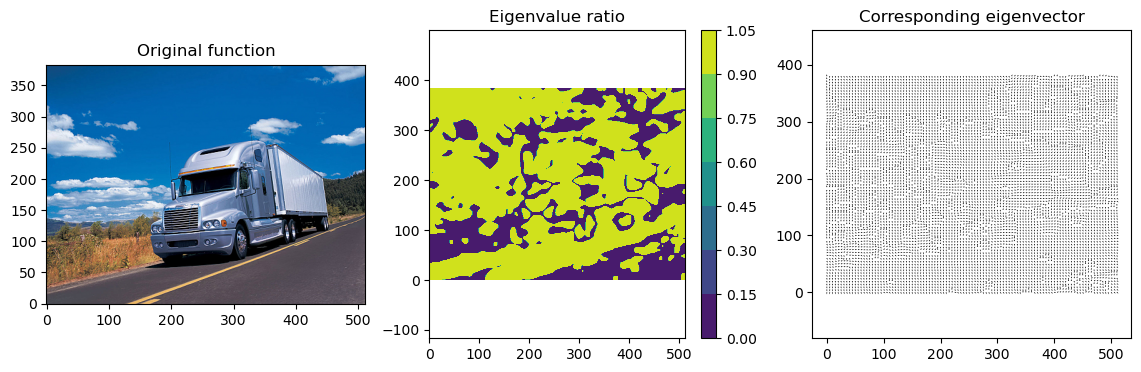

In [22]:
μ,v = eigh(S)
v *= np.sign(v[0])
assert np.max(np.abs(lp.dot_VAV(v[:,0],S,v[:,0])-μ[0]))<1e-5

%matplotlib inline
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.title('Original function')
Plotting.imshow_ij(im)

plt.subplot(1,3,2)
plt.title('Eigenvalue ratio')
plt.contourf(*X,μ[1]/μ[0]>=4)
plt.colorbar(); plt.axis('equal')

plt.subplot(1,3,3)
plt.title('Corresponding eigenvector')
Plotting.quiver(*X,*v[:,1],subsampling=(5,5))
plt.axis('equal');

### 2.2 Edge detection and metric

We define a metric which promotes motion along edge. 
In this model, edges are characterized by the fact that the largest eigenvalue of the structure tensor is large, both in absolute terms and w.r.t the second eigenvalue. 

**Note on models vs neural networks.** 
In this notebook, the metric is defined via a specific mathematical expression implementing an interpretable geometrical model. In contrast, many recent image processing techniques rely on neural networks, which are generic mathematical expressions, implementing data-learned and usually hard to interpret models. 
The latter approach is now regarded as much more efficient in practice, yet it is also more complex to setup, and is unrelated to the topic of this notebook which is the convexity prior in active contour methods.

<!---
**Possible improvement** Set α as a function of the angular resolution ?
--->

In [23]:
def EdgeMetric(μ,α=0.01,λ=1.,κ=2.):
    """
    A metric enhancing motion along edges, inspired by 
    Weickert's edge enhancing diffusion filter,
    based on the structure tensor. 
    Input :
     - μ eigenvalues of the structure tensor (μ[0] <= μ[1])
     - α lower bound on anisotropy
     - λ sensitivity to small details
     - κ sensitivity to anisotropy
    Output : eigenvalues of the metric
    """
    ν = np.maximum(1e-10,μ[1] - κ*μ[0]) / λ # Edge detector. Non-negative. 
    λ0 = np.maximum(α,1.-np.exp(-3.314/ν**4)) # Small diffusion if a feature is detected
    λ1 = np.ones_like(ν) # Unit diffusion in general
    return λ0,λ1 

The following Riemannian metric will guide the geodesic paths along the contour.

In [24]:
riemann = Metrics.Riemann.from_mapped_eigenvalues(S,lambda μ: EdgeMetric(μ,λ=λ))

In order to take advantage of curvature penalization, we build a cost function over the lifted space, which reproduces the metric values.

In [25]:
_,_,aθ = hfmIn.Axes()

In [26]:
cost = np.moveaxis(xp.array([riemann.norm([np.cos(θ),np.sin(θ)]) for θ in aθ]),0,-1)

In [27]:
hfmIn['cost'] = cost

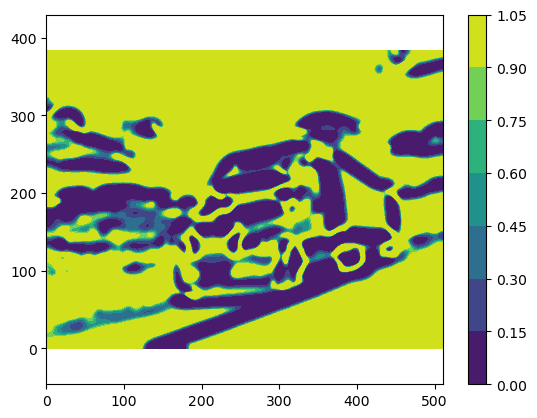

In [28]:
plt.contourf(*X,np.min(cost,axis=2))
plt.colorbar()
plt.axis('equal');

## 3. Geometric input

The provided segmentation method is semi-supervised : at least two points are required, on the contour of interest. 

### 3.1 Pick boundary points

**Interaction** Pick two or more points on the boundary of the shape of interest (in counter-clockwise order).

In [29]:
if interactive:
    %matplotlib tk 
    Plotting.imshow_ij(im,cmap='Greys')
    input_pts = Plotting.pick_points()
    if len(input_pts)>0: boundary_pts=input_pts

Now we need to lift these points to the angular space.

In [30]:
#Find the tangent direction to the contour, 
boundary_pts = xp.array(boundary_pts)
bpts = np.round(boundary_pts).astype(int)
_,tangents = eigh(S[...,bpts[0],bpts[1]])
tangents=tangents[:,0] # Keep only the eigenvector associated with the small eigenvalue

# Find the clockwise orientation
assert len(boundary_pts)>=2
interior_pt = np.mean(boundary_pts,axis=1)
outward_dir = boundary_pts - interior_pt[...,None]
tangents *= np.sign( lp.det([outward_dir,tangents]))

# Construct lifted point
angles = np.mod(np.arctan2(tangents[1],tangents[0]),2*np.pi)
lifted_pts = np.concatenate((boundary_pts,angles[None]),axis=0)

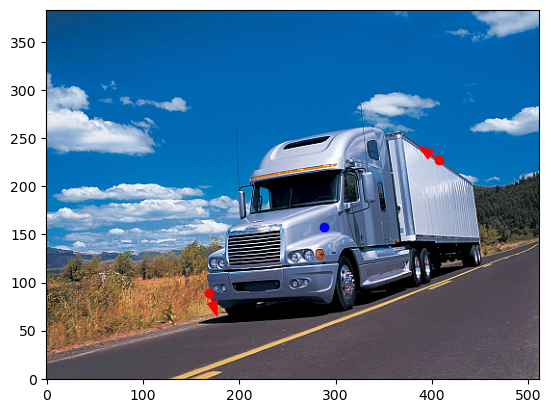

In [31]:
%matplotlib inline
Plotting.imshow_ij(im,cmap='Greys')
for p,v in zip(boundary_pts.T,tangents.T): plt.arrow(*p,*10*v,color='r',head_width=10)
plt.scatter(*boundary_pts,color='r')
plt.scatter(*interior_pt,color='b');

### 3.2 Obstacles

We introduce an obstacle in the angular domain, which is motivated by the following considerations.
Consider a smooth path $\gamma = (x,\theta) : [0,T] \to \Omega \times S^1$. We assume that the physical part is parametrized at Euclidean speed, and obeys the non-holonomic constraint
$$
    x'(t) = (\cos \theta(t),\sin \theta(t)),
$$
for all $t \in [0,T]$. Assume in addition that:
- $\theta$ is non-decreasing
- $\theta(T)-\theta(0)= 2\pi$
- $\gamma(0)=\gamma(T)$. 

Then it is not hard to show that $\gamma$ defines the boundary of a convex shape. 
On the other hand, if $\theta(T)-\theta(0)> 2\pi$ (and the other two conditions hold), then the path is self-intersecting, and in particular it is not the boundary of a convex shape. 

In practice, the path is made of at least two geodesic components, hence let us thus focus on the computation of a minimal path from $(x_0,\theta_0)$ to $(x_1,\theta_1)$, where $\theta_0 \leq \theta_1 \leq \theta_0+2 \pi$.
The obstacle that we introduce mathematically takes the form $\Omega \times \{\theta_*\}$, where $\theta_1 \leq \theta_* \leq \theta_0 + 2 \pi$ and $\Omega$ denotes the physical domain. From $\theta(0) = 0$, $\theta(1) \equiv \theta_1 [\text{mod } 2 \pi]$, $\theta(t) \not \equiv \theta_*[\text{mod } 2 \pi]$, for all $t \in [0,1]$, we obtain that $\theta(1) \equiv \theta_1$.

By concatenating several minimal paths between the successive points $(x_0,\theta_0)$, $(x_1,\theta_1)$, $\cdots$, $(x_0,\theta_0+2\pi)$, we obtain a global contour obeying the conditions above.  

In [32]:
def angular_wall(hfmIn):
    sθ,tθ=hfmIn['seed'][2],hfmIn['tip'][2]
    if tθ>sθ:tθ-=2*np.pi
    mθ = ((sθ+tθ)/2)%(2*np.pi)
    
    dθ = hfmIn.gridScales[2]
    _,_,θs = hfmIn.Grid()
    return np.abs(θs-mθ)<=dθ

We could also add more in physical space, also based on the provided points (from boundary point to boundary point).
Finally, we could allow the user to introduce additional obstacles, based on scribbles.

## 4. Run the eikonal solver

At this point, the user has specified several points $x_0,x_1,\cdots$ on the shape boundary, in counter-clockwise order, and orientations $\theta_0, \theta_1,\cdots \in S^1$ have been automatically selected. 

The full contour segmentation is defined by our method as the concatenation of minimal paths $(x_0,\theta_0)$, $(x_1,\theta_1)$, $\cdots$, $(x_0,\theta_0+2\pi)$, w.r.t a suitable metric.
In this interactive demo, order to save computation time, we however only present the minimal path between two of these successive points, according to the parameter `iseed` below.

In [33]:
iseed = 0 # Change to select the boundary points to connect.

In [34]:
itip = (iseed+1)%lifted_pts.shape[1]
hfmIn['seed'] = lifted_pts[:,iseed]
hfmIn['tip'] = lifted_pts[:,itip]

In [35]:
if xp is np:hfmIn['stopWhenAllAccepted']=hfmIn['tips'] # Early stop of the CPU Eikonal solver to save computation time

Optionally set the angular obstacles.

In [36]:
hfmIn['walls'] = angular_wall(hfmIn)

In [37]:
#model="ReedsSheppForward2"
#hfmIn['xi']=10

### 4.1 Curvature penalized model

We use here a curvature penalized model *without* convexity prior. The resulting segmentation is therefore, usually, non-convex. 

In [38]:
#if xp is not np: hfmIn['traits']={'convex_curvature_macro':False}
hfmIn['model']=model # Standard curvature penalized model
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 2.353 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 10.985


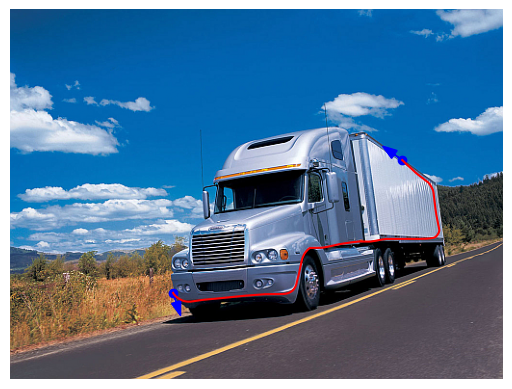

In [39]:
%matplotlib inline
fig = plt.figure(); plt.axis('off')
Plotting.imshow_ij(im,cmap='Greys')
for p,v in zip(boundary_pts.T,tangents.T): plt.arrow(*p,*10*v,color='b',head_width=10)
plt.scatter(*boundary_pts,color='b')
for geo in hfmOut['geodesics']: plt.plot(*geo[:2],color='r')
#savefig(fig,"Truck_ncvx.png")

The non-convexity of the segmented contour is also reflected in the fact that the angular coordinate $\theta$ along the extracted minimal path $(x,\theta) : [0,T] \to \Omega\times S^1$ is not monotically increasing. 

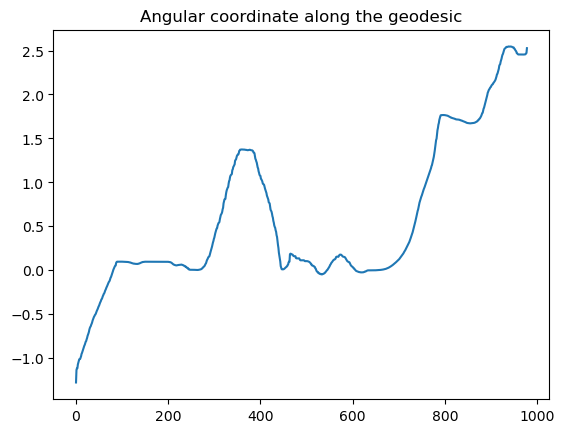

In [40]:
plt.title('Angular coordinate along the geodesic')
plt.plot(geo[2][::-1]);

### 4.2 Convexity constrained model

This model is only available using the GPU eikonal solver.

In [41]:
#assert xp is not np
#hfmIn['traits']={'convex_curvature_macro':True}
hfmIn['model'] = "Convex"+model # Convexity constrained model
hfmOut = hfmIn.Run()

Field verbosity defaults to 1
Field eps defaults to 0.1
Field order defaults to 1
Field seedRadius defaults to 0
Fast marching solver completed in 0.80805 s.
Field geodesicSolver defaults to Discrete
Field geodesicStep defaults to 0.25
Field geodesicWeightThreshold defaults to 0.001
Field geodesicVolumeBound defaults to 10.985


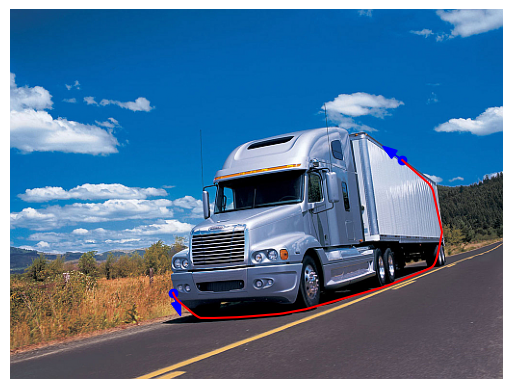

In [42]:
%matplotlib inline
fig = plt.figure(); plt.axis('off')
Plotting.imshow_ij(im,cmap='Greys')
for p,v in zip(boundary_pts.T,tangents.T): plt.arrow(*p,*10*v,color='b',head_width=10)
plt.scatter(*boundary_pts,color='b')
for geo in hfmOut['geodesics']: plt.plot(*geo[:2],color='r')
#savefig(fig,"Truck_cvx.png")

The extracted boundary is now convex, and the angular coordinate is non-decreasing, as desired.

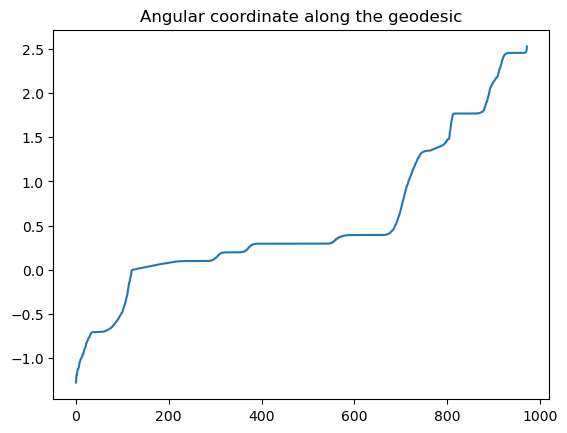

In [43]:
plt.title('Angular coordinate along the geodesic')
plt.plot(geo[2][::-1]);